# Welcome to the Machine learning for IDE students application!

This is a JupyterNotebook created for IDE students to get introduced to using machine learning for prototype improvement. It might seem like a lot if you don't have any coding experience, but just follow the steps, read the instructions and it should be a breeze! 

## Try the program

We have filled out the program in such a way that everything is set up with an example dataset. Feel free to go through te application one time, before changing in to your own data / preferences. This way you can get a feeling of hoe the product works and what is needed for a good running program. 


## Setting up

This application will take you through the preprocessing, labeling and classification steps of the machine learning process. Make sure you've read through the [User Guide](https://docs.google.com/document/d/1J9c5sHokh8Rj-4lO4yKX1Tv7LwY2_r-mfQ9YKviiXZk/edit?usp=sharing) before you continue.


### Kernel

The kernel is like the engine of the application, this runs all the python code. Sometimes the kernel crashes, most of the times it is because of a bug. When the kernel has crashed, you need to restart it under the kernel tab in the notebook. When you restart the kernel you need to run most cells again depending on where you were in the process. Sometimes you do not need to do the prepocessing and labeling again, depending if you have already finished this. Alls cells that you have not ran before the kernel crashed, do not need to be rerun!.

**Cells to run when the kernel crashes:** 2,3,4,7

**Cells you do not have to rerun:** 1

### Setting up the packages

To be able to access the code we need to import packages. The second set of packages are written by us and contain the main functions of the program. The actual Python code is to be found in different files, so you have a nice interface without a bunch of code.

**Make sure you run the two cells below!** To run your first cell, just click inside the cell and press play. You can consult [this tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) if you experience difficulty using Anaconda.
ATTENTION: This is a large operation, keep that in mind, this might take a few minutes. It is very important to run the code completely, so only continue after the * before the cell has disappeared

These are standard python packages that most programs need to run properly.

In [5]:
# 1

# installing all the online packages that are needed for the program.
!pip3 install numpy==1.21.4
!pip3 install pandas==1.5.2
!pip3 install matplotlib==3.6.3
!pip3 install scikit-learn==1.2.0
!pip3 install plotly==5.12.0
!pip3 install IPython==8.8.0
!pip3 install kaleido==0.2.1

     ---------------------------------------- 14.0/14.0 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\timoz\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



These are our own packages, we created these for you so that you don't have to see all the code, but only the things you need.

In [1]:
# 2

#Importing all the local packages that have been made for this application.
from AI_for_Designers.data_processing import Preprocessing, empty_files
from AI_for_Designers.active_learning import ActiveLearning
from AI_for_Designers.novelty_detection import NoveltyDetection
from AI_for_Designers.data_stats import Stats
from AI_for_Designers.Notebook import check_product_name, amount_of_samples

In the cell below, the name of the Product you are analysing can be changed. It helps to come up with a descriptive name like the name of the prototype. ATTENTION: the name should only contain letters, numbers, underscores and dashes. 

In [2]:
# 3

# Naming the product that is analysed eg. 'Vacuum_cleaner' 'chair' 'tablet'
Product = 'Mok'
check_product_name(Product)

Name is valid!


## Pre-processing
Pre-processing is needed to create understandable information for the computer. Raw telemetry data like ours is hard to understand for the computer, therefore we conduct pre-processing. During preprocessing, the raw data gets divided into frames. Frames are data points that are encapsulated in a frame. This makes for more certain predictions and a faster model because it knows more about a frame and there are fewer datapoints.

There are **4 variables** that are important for you to edit:

 - `frame_size`: set larger for slow movements, smaller for very quick movements. A frame size of about the length of one action is advised. Default = 2 sec
 - `frame_offset`: increase if you set a bigger frame size. A frame offset of around 10-20% of the frame size is advised. A lower frame offset might result in a more accurate model but will result in more work for you. Default = 0.2 sec
 - `start_offset`: set it to the time it takes in seconds between starting the recording and starting with the actual Product usage.
 - `stop_offset`: the same as the start_offset, but for the end of a recording

Enter the values below, and run the cell to start the preprocessing. The frame size and the frame offset can be changed in the cell below, while the start_offset and the stop_offset need to be changed in all the lines that start with 'pre.windowing'. ATTENTION: the frame size and the frame offset, need to be the same for all the different files, while the start_offset and the stop_offset may differ.

After you've preprocessed your data, the application will have extracted features like standard deviation and most present frequency. These features will be used to analyze the characteristics of a frame and classify it to the action.

In [3]:
# 4

# Setting the frame size and frame offset
frame_size = 0.7
frame_offset = 0.1

The cell below is where you enter all the data and the variables. 

First it makes empty files for the data that is generated in the preprocessing. This is just for us to save the features and data, there is no need for you to see what this is, although you can take a look at them once they're generated.

This looks like this:
          
```python 
pre.windowing(input_file=[r'Data/data-mok/Gijs_Mok_GH010035-ACCL.csv', r'Data/data-mok/Gijs_Mok_GH010035-GYRO.csv'], # these are the accl and gyro datafiles. It is easiest to put your own data inside the data folder and change the path accordingly.
              video_file='Data/data-mok/GL010035_LRV.mp4', # this is the corresponding video file
              start_offset = 0, # here you can enter the start ofset for this file
              stop_offset = 0, # here you can enter the stop ofset for this file
              size = frame_size, # this is done automatically, because you assigned them already
              offset = frame_offset) # this is done automatically, because you assigned them already
            
```
The more different files you have, the more times you need to fill this in.

In [4]:
# 5

# making the data files for the storage of the data
empty_files([f'Preprocessed-data/{Product}/features_{Product}.txt',
             f'Preprocessed-data/{Product}/features_{Product}_scaled.csv',
             f'Preprocessed-data/{Product}/processed_data_files.txt'])

# Make a preprocessing object that corresponds with the product
pre = Preprocessing(Product)

# Insert the data into the preprocessing object.
pre.windowing(input_file=[r'Data/data-mok/Gijs_Mok_GH010035-ACCL.csv', r'Data/data-mok/Gijs_Mok_GH010035-GYRO.csv'],
              video_file='Data/data-mok/GL010035_LRV.mp4',
              start_offset=0, 
              stop_offset=0, 
              size=frame_size,
              offset=frame_offset)

# example of extra datafile with video (uncomment if needed)

'''
pre.windowing(input_file=[r'Data/data-mok/Gijs_Mok_GH010036-ACCL.csv', r'Data/data-mok/Gijs_Mok_GH010036-GYRO.csv'],
              video_file='Data/data-mok/GL010036_LRV.mp4',
              start_offset=0, 
              stop_offset=0, 
              size=frame_size,
              offset=frame_offset)
              
'''


# Initiate the scaler on the preprocessing object, in order to get scaled features.
pre.SuperStandardScaler(fr'Preprocessed-data\{Product}\features_{Product}.txt')

Amount of sensors: 6, amount of features per sensor: 8


## Labeling and training

If you've set up your preprocessing correctly this step should be quite easy. The application will show you part of your recording, and you will be asked to label it according to the action performed on screen. You can add a new label if the Product you see is not one of the options you expected. 

First, enter the activities that you think will be in the video. Don't worry about doing this too much, you can always add more labels later in the code block below, however if you restart training, these will be lost. To enter a new label enter the new label according to the explananation during labeling, this will add it.

An example:
```python 
   labels = ['Still', 'Pick_up', 'Put_down', 'Drinking', 'Walking']
   ```


Enter your labels inside the code block below. **Only change the text inside the brackets, remember to put the names in quotation marks and separate them by commas**.

Next up is training the model. After entering your labels, run cell 6,7 and 8 and you will be shown a part of your own recorded video and asked to label the activity you see. Take your time to label the data correctly, as the results fully rely on accurate labels. You get the option to delete a data point if you are not completely sure about the label ("x") e.g. the sample contains two different actions or if it's a faulty sample. 

The value of 'active_learning_iterations', is the amount of samples you will label. The more samples you label, the more accurate the model might become, but the more time it will consume. Labeling round 10-20% of the total amount of samples or at least 100 samples is advised for a good model (enter this in `active_learning_iterations`). The cell below can be used to find the amount of available samples.

After labeling 16 samples, an image with the labeled frames will show, this is so you can see the data in perspective, the image shown is a PCA anaysis. Also the model will have its first version, so the probabilities of the class according to the model is shown. This does not mean that the model is right! you still need to enter your answer. 


In [4]:
# 6

# This code shows you the amount of datapoints you have for the active learning.
print(amount_of_samples(f'Preprocessed-data/{Product}/processed_data_files.txt'))

1891


In [5]:
# 7

# Here you can put the labels of the activities that you think are goin to be in the video. You can always add later.
labels = ['Still', 'Pick_up', 'Put_down', 'Drinking', 'Walking']

# this is the ammount of iterations that it will use for the active learning, see text for more context
active_learning_iterations = 0

In [6]:
# 8

# No need for any modification here, just run it.
AL = ActiveLearning(fr'Preprocessed-data/{Product}/features_{Product}_scaled.csv', Product, labels, frame_size)
labels = AL.training(active_learning_iterations, random_points=1)
AL.write_to_file()

Enter the index or the name of one of the following labels. Enter 'n' to add a new label or 'x' to discard this sample:
1. Still
2. Pick_up
3. Put_down
4. Drinking
5. Walking


KeyboardInterrupt: Interrupted by user

In order to get an idea of how accurate the model is, it is advised to label some more data. These frames are not used in training the model, but the model is used to predict the action that is happening in this frame. By telling the model which action actually is happening in the frame, the accuracy can be measured, by calculating the error rate (dividing the wrong labled frames by the total amount of frames). It is advised to label at least 20 frames, but preferably more (about 50). The more frames are labled, the better the indication of the accuracy is.

In [8]:
# 9

# start the testing and enter how many tests you want to run in the brackets.
AL.testing(5)

TESTING
Enter the index or the name of one of the following labels. Enter 'n' to add a new label or 'x' to discard this sample:
1. Still
2. Pick_up
3. Put_down
4. Drinking
5. Walking
Error rate: 1.0 (5 samples)


In [7]:
#10

# No need to change anything here.
# Detect the noveties
ND = NoveltyDetection(fr'Preprocessed-data/{Product}/features_{Product}_scaled_AL_predictionss.csv', fr'Preprocessed-data/{Product}/processed_data_files.txt')
novelties = ND.detect(0.1)

# Display the novelties
ND.play_novelties(novelties, frame_size)

### Information about your data

To get more information about your data, please run the cell below to see a timeline with the classified actions. 
Do notice that if you have multiple files, they are stitched together in one timeline.

Percentages per label:
 Still: 0.10773298083278256
 Pick_up: 0.5776602775941837
 Put_down: 0.20819563780568406
 Drinking: 0.04560475875743556
 Walking: 0.06080634500991408


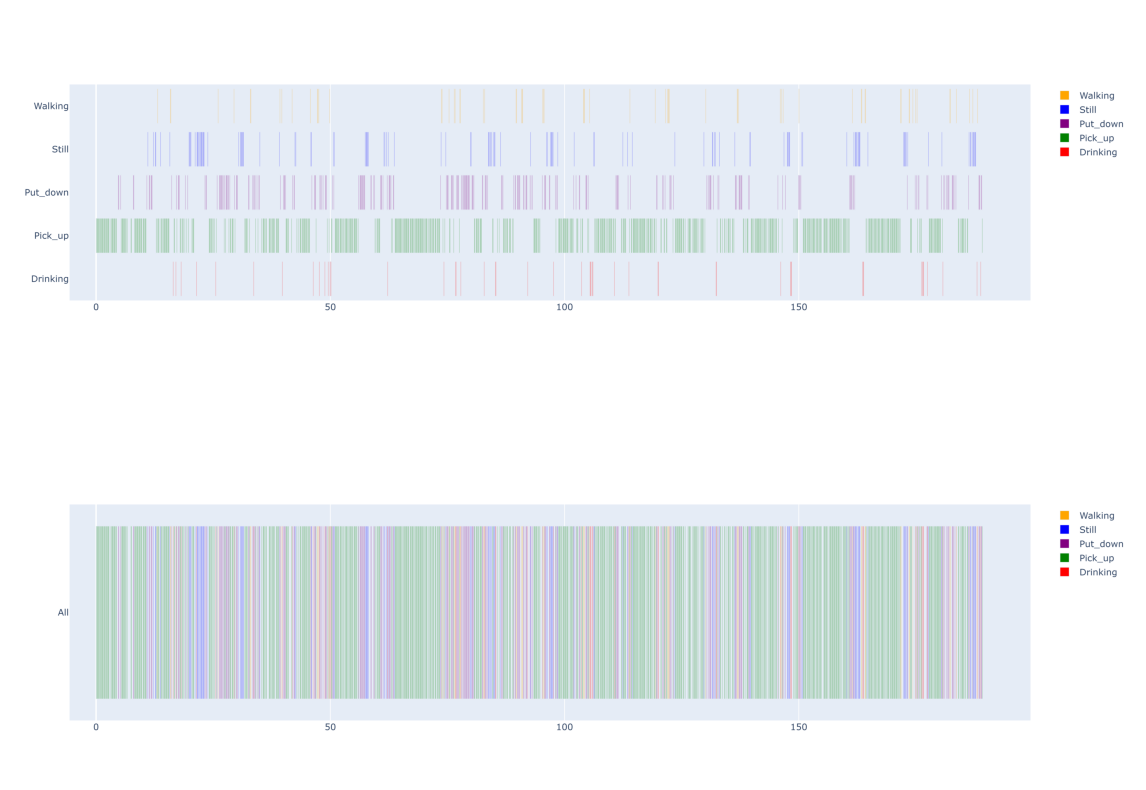

In [10]:
# 11

# Print and generate some statistics about the product usage for analysis.
stats = Stats(fr'Preprocessed-data/{Product}/features_{Product}_scaled_AL_predictionss.csv', labels)
stats.print_percentages()
stats.show_ghan_chart(frame_offset)

## New Data

In the section beneath we will quickly run through some of the same steps as above, but now we can feed the model that we created with new, unseen data. The model created in the steps above will be used to predict the actions happening in this unseen data. This can be helpful for testing the robustness of your model when data was gathered by different people. 

Moreover, this is the step where you can enter data that has not been gathered in a controlled environment, but real life data, for you to analyse real product usage and not what you thought was going to happen.

Now you can feed the trained model more data by changing the 'pre_new.windowing' function!!

In [6]:
# 12

import numpy as np
import pandas as pd
import pickle

empty_files([f'Preprocessed-data/{Product}_new/features_{Product}_new.txt',
             f'Preprocessed-data/{Product}_new/features_{Product}_new_scaled.csv',
             f'Preprocessed-data/{Product}_new/processed_data_files.txt'])

# Load the model that you made using pickle
model = pickle.load(open(fr'Models/model_{Product}_{active_learning_iterations}.pickle', 'rb'))

# Preprocess the new data
pre_new = Preprocessing(f'{Product}_new')
pre_new.windowing([r'GoPro\Gijs_Mok\Gijs_Mok_GH010035-ACCL.csv', r'GoPro\Gijs_Mok\Gijs_Mok_GH010035-GYRO.csv'], 
                    'GoPro\Gijs_Mok\GL010035_LRV.mp4',
                    start_offset=0, 
                    stop_offset=0, 
                    size=frame_size, 
                    offset=frame_offset, 
                    epsilon=0.01, 
                    do_plot=False, 
                    do_scale=True)

# Predict the label of all samples based on the 
new_dataset = pd.read_csv(fr'Preprocessed-data/{Product}_new/features_{Product}_new_scaled.csv', delimiter=',')
predictions = model.predict(np.array(new_dataset.iloc[:, 3:]))

# Replace the labels and write them to a new AL prediction file
new_dataset['label'] = predictions
new_dataset.to_csv(fr'Preprocessed-data/{Product}_new/features_{Product}_new_scaled_AL_predictionss.csv', index=False)

# Novelty detection for the new set
ND2 = NoveltyDetection(fr'Preprocessed-data/{Product}_new/features_{Product}_new_scaled_AL_predictionss.csv', fr'Preprocessed-data/{Product}_new/processed_data_files.txt')
novelties = ND2.detect(0.1)
ND2.play_novelties(novelties, frame_size)

# Use the new file to retrieve the predicted timeline
stats = Stats(fr'Preprocessed-data/{Product}_new/features_{Product}_new_scaled_AL_predictionss.csv', labels)
stats.print_percentages()
stats.show_ghan_chart(frame_offset)

NameError: name 'active_learning_iterations' is not defined

Voor de zekerheid ff een trashbin

In [ ]:
# pre.windowing([r"Data/data-lopen/Walking_part_1.csv", r"Data/data-lopen/Walking_part_1_gyro.csv"], r"Data/data-lopen/Walking_part_1.mp4",
#               start_offset=2.5, stop_offset=5, size=1, offset=0.2, video_offset=2.5, epsilon=0.01, do_plot=False, do_scale=False)
# pre.windowing([r"Data/data-lopen/Walking_part_2.csv", r"Data/data-lopen/Walking_part_2_gyro.csv"], r"Data/data-lopen/Walking_part_2.mp4",
#               start_offset=2.5, stop_offset=5, size=1, offset=0.2, video_offset=2.5, epsilon=0.01, do_plot=False, do_scale=True)
# pre.windowing([fr'Data\data-cycling\ACCL\Timo_fietsen_GH010031-ACCL.csv', fr'Data\data-cycling\GYRO\Timo_fietsen_GH010031-GYRO.csv'], 'Data\data-cycling\Fiets_filmpjes\GL010031_LRV_compressed.mp4',
#               start_offset=0, stop_offset=0, size=5, offset=0.5, epsilon=0.01, do_plot=False, do_scale=False)
# pre.windowing([fr'Data\data-cycling\ACCL\Timo_fietsen_GH010032-ACCL.csv', fr'Data\data-cycling\GYRO\Timo_fietsen_GH010032-GYRO.csv'], 'Data\data-cycling\Fiets_filmpjes\GL010032_LRV.mp4',
#               start_offset=0, stop_offset=0, size=5, offset=0.5, epsilon=0.01, do_plot=False, do_scale=False)
# pre.windowing([fr'Data\data-cycling\ACCL\Timo_fietsen_GH010033-ACCL.csv', fr'Data\data-cycling\GYRO\Timo_fietsen_GH010033-GYRO.csv'], 'Data\data-cycling\Fiets_filmpjes\GL010033_LRV.mp4',
#               start_offset=0, stop_offset=0, size=5, offset=0.5, epsilon=0.01, do_plot=False, do_scale=False)
# pre.windowing([fr'Data\data-cycling\ACCL\Timo_fietsen_GH010034-ACCL.csv', fr'Data\data-cycling\GYRO\Timo_fietsen_GH010034-GYRO.csv'], 'Data\data-cycling\Fiets_filmpjes\GL010034_LRV_compressed.mp4',
#               start_offset=0, stop_offset=0, size=5, offset=0.5, epsilon=0.01, do_plot=False, do_scale=True)